<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [65]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное     _**RM**_
2.   Равномерное  _**не видно такого**_
3.   Биноминальное  _**MEDV**_
4.   Бернулли        _**CHAS**_
5.   Геометрическое   _**CRIM**_
6.   Логнормальное  _**DIS, LSTAT**_



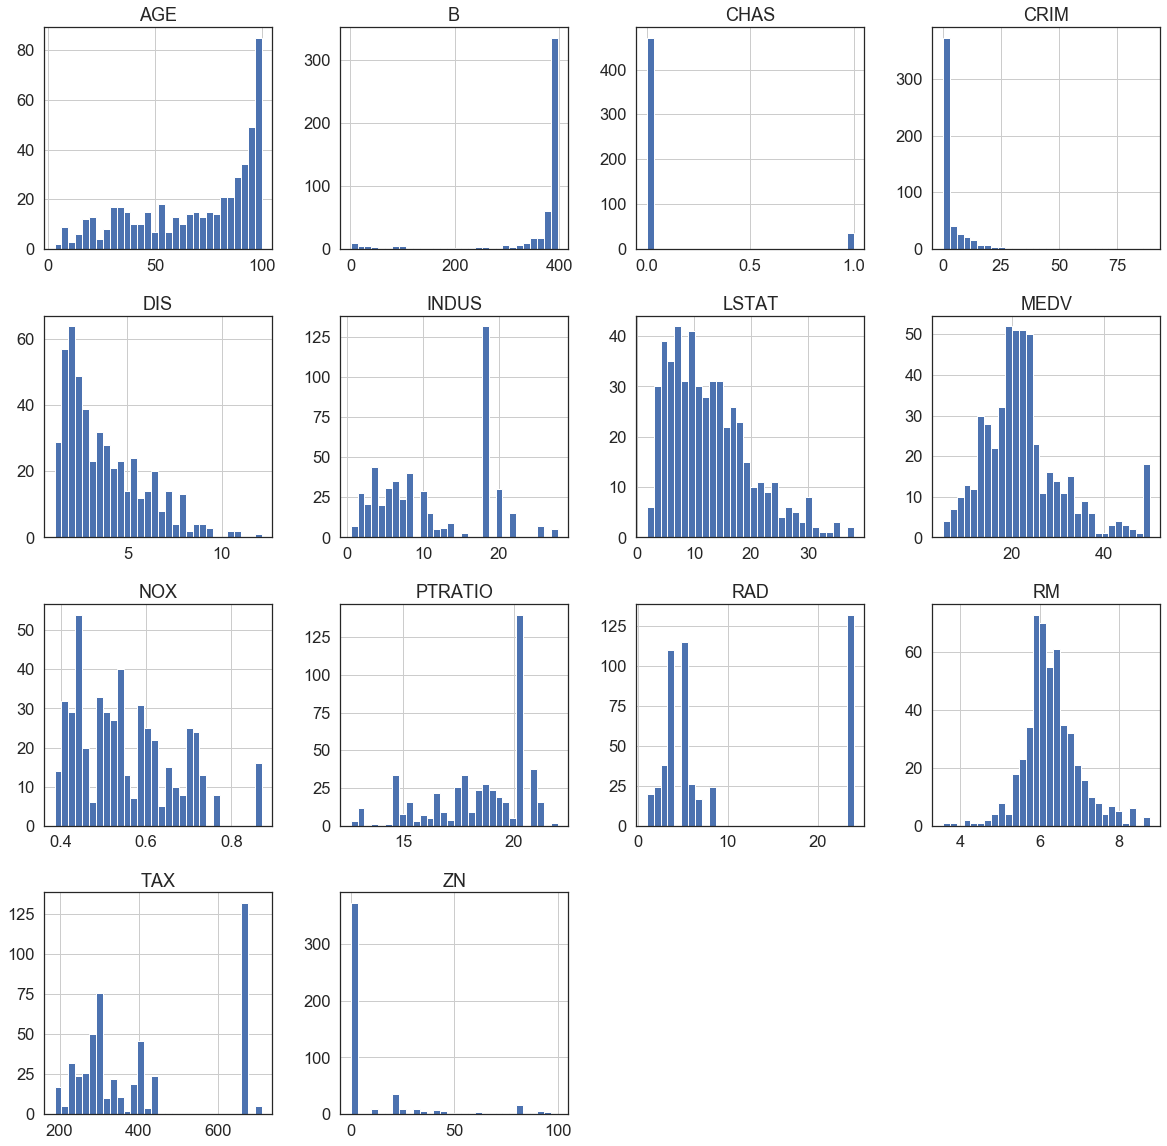

In [34]:
p = data[names].hist(figsize=(20,20), bins = 30)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [67]:
data['LSTAT'].fillna(0, inplace = True)
data['MEDV'].fillna(0, inplace = True)

In [69]:
lstat = data['LSTAT']
medv = data['MEDV']

In [70]:
lstat = np.array(lstat).reshape(-1,1)
medv = np.array(medv).reshape(-1,1)

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    lstat,
    medv,
    test_size = 0.2,
    random_state = 3
)

In [73]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
predicted_y = model.predict(X_test)

In [75]:
model.score(X_test, y_test)

0.5690773142169756

Точность на тестовых данныз 57 процентов.  Не очень...  Хотя на графике корреляция есть и линейная регрессия смотрится вполне адекватно...

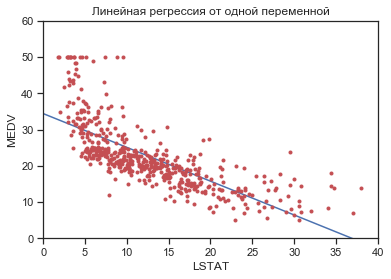

In [79]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(lstat, medv, 'r.')
plt.xlim(0,40)
plt.ylim(0,60)
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


In [4]:
countries = data.groupby('Country (region)')
print('В выборке ', len(countries), ' стран')

В выборке  156  стран


Я бы, прежде чем считать матрицу ковариаций, удалил бы пустые значения.  
Ну или забил бы их нулями.  Давайте посмотрим, сколько их вообще.  Если немного, то удалим.  А если много, то забьем нулями.  

In [5]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Ну вроде не очень много.  Всего 23 из 156 стран имеют пустые данные.  Удалю...

In [6]:
print('Было стран ',len(data))
data.dropna(axis = 0, inplace = True)
print('Стало стран ', len(data))

Было стран  156
Стало стран  140


In [7]:
#Если между странами, то так
X = data.iloc[:, 1:10]
covm = np.round_(np.cov(X), decimals=1)
print(covm)

[[ 310.1  120.9   46.9 ...  129.8 -116.7 -218.3]
 [ 120.9   90.3   65.9 ...  -42.2  -28.8   -8.8]
 [  46.9   65.9   70.2 ...  -13.3    6.3   -4.3]
 ...
 [ 129.8  -42.2  -13.3 ... 1656.9  318.8  -16.4]
 [-116.7  -28.8    6.3 ...  318.8  296.4  390.9]
 [-218.3   -8.8   -4.3 ...  -16.4  390.9 1131.2]]


In [8]:
#Но считат ковариацию между странами не очень интересно.  Интереснее попарная между показателями.
X = data.iloc[:, 1:10]
covm = np.round_(np.cov(X.T), decimals=1)
print(covm)

[[2088.6 1171.9 1037.  1097.7 1745.  1126.4  437.4  992.8 1626. ]
 [1171.9 2127.2  184.7 1298.8 1268.   520.6  498.4  797.  1327.7]
 [1037.   184.7 1965.3  694.3  880.1 1393.   427.2  827.   597.5]
 [1097.7 1298.8  694.3 1980.8 1369.   835.   316.   697.8 1091.7]
 [1745.  1268.   880.1 1369.  2099.1  989.2  291.   918.3 1592.9]
 [1126.4  520.6 1393.   835.   989.2 2034.8  784.2 1005.2  754.8]
 [ 437.4  498.4  427.2  316.   291.   784.2 1819.5  536.4  344.2]
 [ 992.8  797.   827.   697.8  918.3 1005.2  536.4 2000.6  891.6]
 [1626.  1327.7  597.5 1091.7 1592.9  754.8  344.2  891.6 1879.8]]


Сколько стран в выборке? Написать ответ. 

In [9]:
countries = data.groupby('Country (region)')
print('В выборке осталось', len(countries), ' стран')

В выборке осталось 140  стран


Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материков 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Как определить, к какому материку относится тот или иной элемент? 
Можно написать словарь, в котором ключ - страна, а значение - это материк для данной страны.

Список стран по континентам: https://simple.wikipedia.org/wiki/List_of_countries_by_continents. 

Как работать со словарями - https://pythonworld.ru/tipy-dannyx-v-python/slovari-dict-funkcii-i-metody-slovarej.html


Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента, это **проблема классификации**. 

In [21]:
url=r'https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv'
df = pd.read_html(url)

In [26]:
ctc = df[0][['name', 'region']]
ctc.columns = ['Country (region)', 'continent']
ctc.head()

,Country (region),continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [33]:
data = data.merge(ctc, how = 'left')

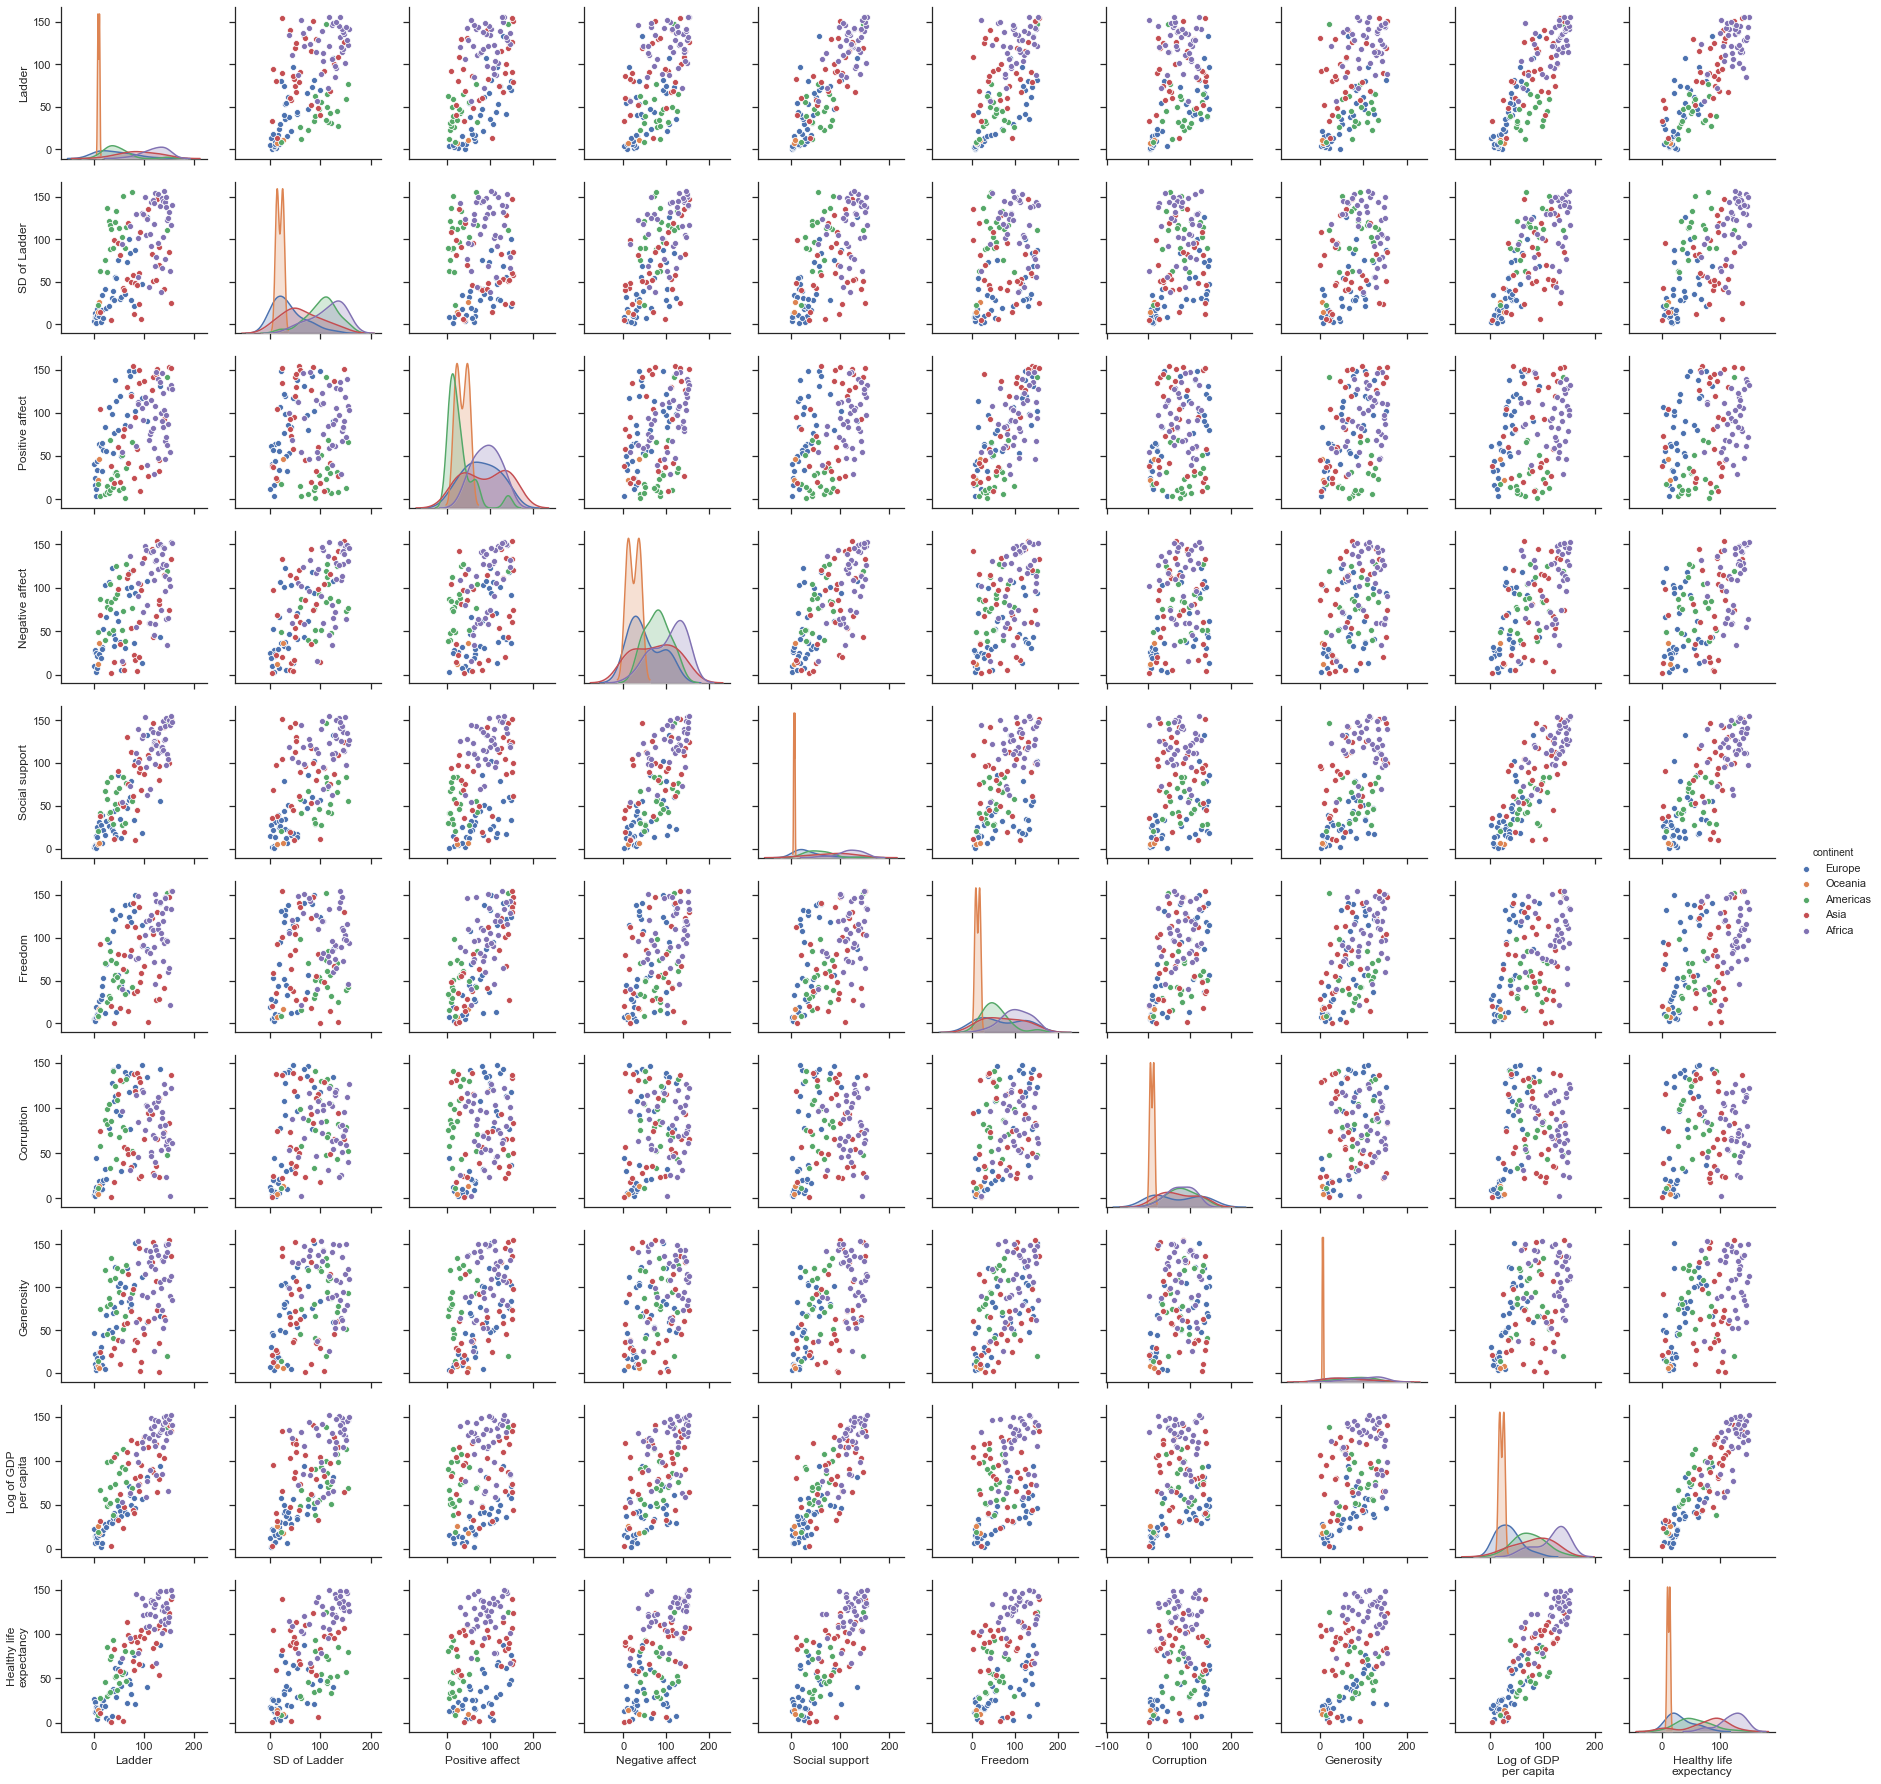

In [50]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, hue='continent')
plt.show()

Сильно отличается Океания, остальные континенты похожи друг на друга.

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

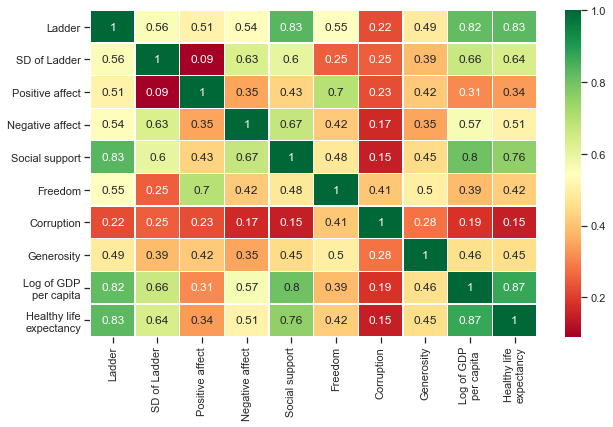

In [55]:
ax = sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


Значительая корреляция наблюдается между данными Log of GDP per Capita и Ladder, Social support и Healthy life, что вообщем то очевидно: люди ощущают себя более счастливыми в странах с выскоим GDP, у них появляется стремление вести здоровый образ жизни.

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

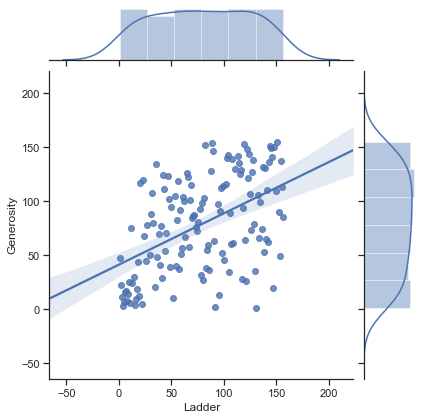

In [59]:
sns.jointplot(x='Ladder', y='Generosity', 
              data=data, kind='reg')

Между Ladder и Generiosity корреляция слабая.  Регрессионная прямая не является собственным вектором.  Построим собственные вектора.

Собственное значение:  3038.36 Собственный вектор:  [0.72258657 0.69128044]


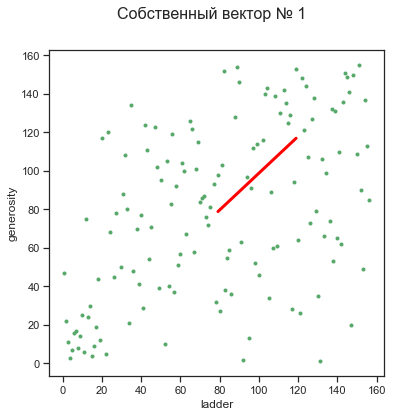

Собственное значение:  1050.77 Собственный вектор:  [-0.69128044  0.72258657]


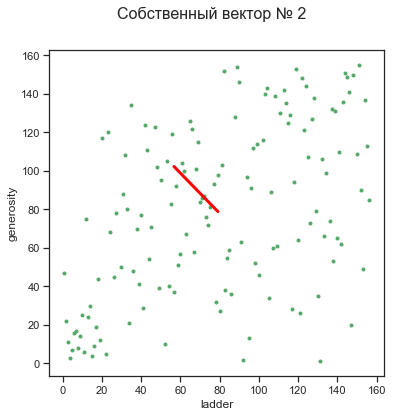

In [64]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

ladder = data['Ladder']
generosity = data['Generosity']

Y = np.vstack((ladder, generosity)).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(ladder, generosity, 'g.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('ladder')
    plt.ylabel('generosity')
    plt.plot([ladder.mean(), ladder.mean() + math.sqrt(w[i]) * v[:,i][0]], 
             [generosity.mean(), generosity.mean() + math.sqrt(w[i]) * v[:,i][1]],color='red', linewidth=3)
    plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

# Не успеваю!!!   Полчаса до полночи!!!   Вы или продлите мне дедлайн, или примите хотя бы на троечку то, что я уже сделал :))))    В принципе, я понимаю, что здесь должно получиться - при большом числе испытаний распределение станет близко к Гауссу, что лишний раз подтвердит теорему Лапунова...

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?